# Face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.

관련된 라이브러리를 가져옵니다. request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.

In [1]:
import requests #통신에 필요함
from io import BytesIO
from PIL import Image,ImageDraw,ImageFont #이미지 오픈, 이미지에 쓰기, 이미지에 글자쓰기

Subscription Key와 서비스의 주소를 설정합니다.

In [2]:
subscription_key='cfed609ad3ef4031bb274bb3e808e302'

In [18]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect'

face API를 사용할 것이며,버전을 명시하고, Detect에 사용할 것이라는 뜻

분석에 사용할 이미지를 사용합니다

In [19]:
image_url='https://spnimage.edaily.co.kr/images/Photo/files/NP/S/2021/06/PS21060200016.jpg'

In [20]:
img=Image.open(BytesIO(requests.get(image_url).content))

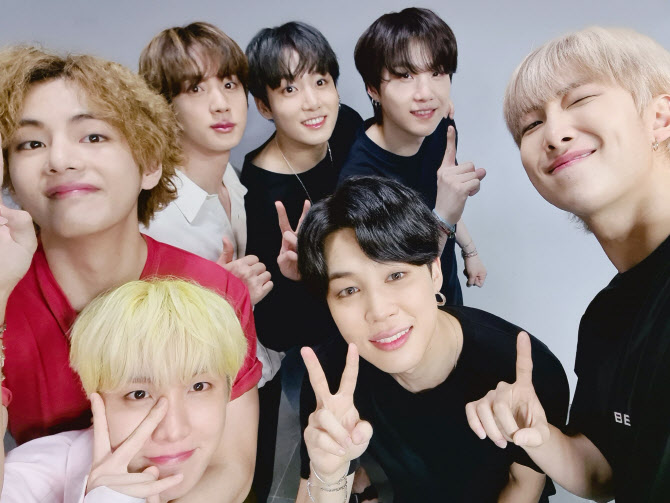

In [21]:
img

In [22]:
headers={'Ocp-Apim-Subscription-Key':subscription_key}
params={
    'returnFaceID':'true',
    'returnFaceAttributes':'age,gender'
}

In [23]:
data={'url':image_url}

서비스를 호출해서 결과를 확인합니다

In [24]:
response=requests.post(faceDetection_url,headers=headers,params=params,json=data)

In [25]:
faces=response.json()

In [26]:
faces

[{'faceId': '2eaa93ed-5805-4b84-8e44-1ce118d6bdfa',
  'faceRectangle': {'top': 353, 'left': 100, 'width': 140, 'height': 140},
  'faceAttributes': {'gender': 'male', 'age': 26.0}},
 {'faceId': '26759dc9-3376-46d9-a14f-1ac4b10d0023',
  'faceRectangle': {'top': 104, 'left': 5, 'width': 123, 'height': 123},
  'faceAttributes': {'gender': 'male', 'age': 18.0}},
 {'faceId': '17d0eae2-f246-4b47-a545-dfe255014a54',
  'faceRectangle': {'top': 250, 'left': 322, 'width': 117, 'height': 117},
  'faceAttributes': {'gender': 'male', 'age': 26.0}},
 {'faceId': 'a1406aac-d9f8-49b2-b842-453ccdd767e0',
  'faceRectangle': {'top': 77, 'left': 502, 'width': 116, 'height': 116},
  'faceAttributes': {'gender': 'male', 'age': 23.0}},
 {'faceId': 'e385db97-0790-46b4-a30c-8c6e0968361b',
  'faceRectangle': {'top': 65, 'left': 177, 'width': 81, 'height': 81},
  'faceAttributes': {'gender': 'male', 'age': 22.0}},
 {'faceId': '97146bbe-a924-4645-a443-0f15a2c0412b',
  'faceRectangle': {'top': 52, 'left': 382, 'widt

In [28]:
draw=ImageDraw.Draw(img)

In [43]:
for face in faces:

    rect = face['faceRectangle']

    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']

    draw.rectangle(((left,top),(left+width,top+height)), outline='red')

    face_info = face['faceAttributes']
    age = face_info['age']
    gender = face_info['gender']
    result = 'Gender:' + gender + ' Age:' + str(age)

    draw.text((left, top), result, fill='red')

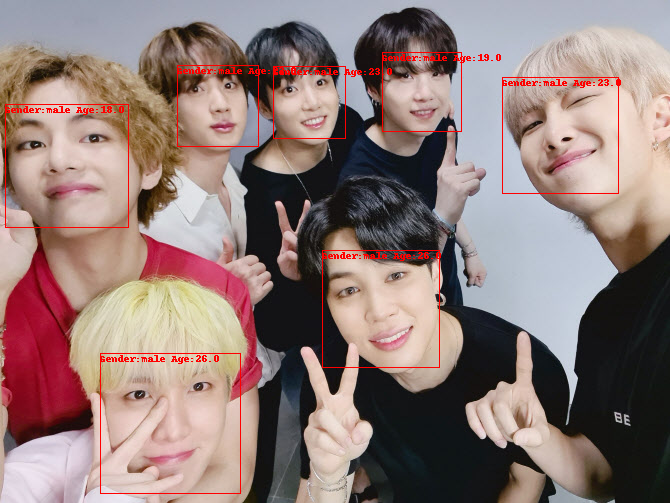

In [44]:
img